## Name: Rajesh Bisht , Batch-8
## Email Id: rbisht.india@gmail.com 
## Assignment-4
### Git Hub : https://github.com/RajeshBisht28/Assignment4_ML.git

###  Question-1: Import the attached Indian_food.csv file in Jupyter notebook and perform following data cleaning operations through operations using Pandas and visualizations using Matplotlib, Seaborn and Plotly
### Data Source- Indian_food.csv 

### Load Indian_food.csv 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("Indian_food.csv")
num_columns = df.shape[1]
print(f"Total columns: {num_columns}")
num_rows = df.shape[0]
print(f"Total rows: {num_rows}")
df.head()

Total columns: 8
Total rows: 253


,Name,Ingredients,Diet,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40,sweet,dessert,West Bengal,East


### Question-1: a) In the state column, replace the -1 with the mode of state column.

In [52]:
# Calculate the mode of the "state" column. 
# The mode is the most frequently occurring value in that column.
#
mode_state = df['state'].mode()[0]
print(f"Mode value of State: {mode_state}")
# Replace -1 with the mode value 
## with updated DataFrame
df['state'] = df['state'].replace(-1, mode_state)


Mode value of State: Gujarat


### Question-1: b) Whatever the state you got in previous question, 
### fill the corresponding region in the region column

In [59]:
## All Region list of mode state
## mode_state : from previous question

mode_State_all_regions = df.loc[df['state'] == mode_state, 'region']
## Get first value of state
fr_region = mode_State_all_regions.iloc[0]
## Region of mode_state
df.loc[df['state'] == mode_state, 'region'] = fr_region
print(f"Region of mode region state is {fr_region}")

Region of mode region state is West


### Question-1: c) Replace the -1 with mean for cook time variable.

In [60]:
## Replace the -1 with mean for cook time variable.
mode_cook_time = df['cook_time'].mode()[0]
print(f"Mode value of cook_time: {mode_cook_time}")
# Replace -1 with the cook_time mode value 
## with updated DataFrame
df['cook_time'] = df['cook_time'].replace(-1, mode_cook_time)

Mode value of cook_time: 30


#### After performing these data cleaning steps, perform the below visualizations. You can use any of the 3 libraries (Matplotlib, seaborn, Plotly)

### Question-1: d) Most preferred flavours by number of customers using pie chart.

flavor_profile
spicy     133
sweet      90
salty      14
chilli     10
sour        6
Name: count, dtype: int64
Index(['spicy', 'sweet', 'salty', 'chilli', 'sour'], dtype='object', name='flavor_profile')


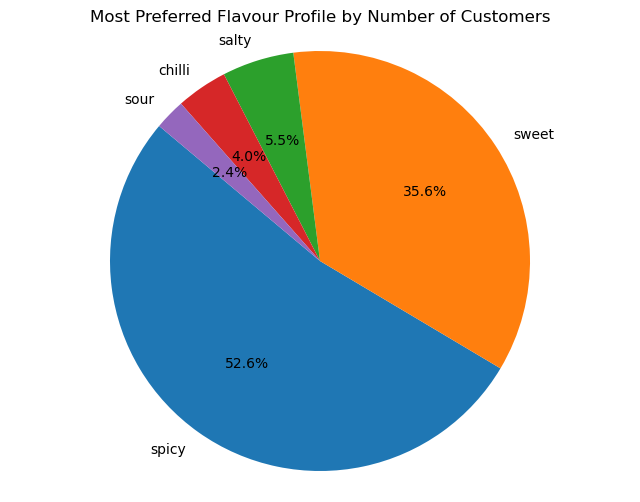

In [37]:
 # Get List of  flavour_profile
flavor_profile_list = df['flavor_profile'].tolist()
#Count the occurrences of each flavor_profile
flavour_profile_counts = df['flavor_profile'].value_counts()
print(flavour_profile_counts)
print(flavour_profile_counts.index)
## Labels for pie chart - name of flavor_profile
flavor_labels = flavour_profile_counts.index
# Create a pie chart based on flavour_profile_counts
# Figure sixe 8*6 Inches
plt.figure(figsize=(8, 6))
# LAbels are : flavour_profile_counts.index 
plt.pie(flavour_profile_counts, labels=flavor_labels, autopct='%1.1f%%', startangle=140)
plt.title('Most Preferred Flavour Profile by Number of Customers')
# Equal aspect ratio : pie is drawn as a circle.
plt.axis('equal') 
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'PieChart_flavour_profile_numfF_customers.png'))
# Display the pie chart
plt.show()

In [35]:
pwd

'E:\\IIT_GUWAHATI\\Assignment4\\Assignment4_Final'

### Question-1: e) Most requested course by customers using Bar chart. 
### Print the labels also on the top of each bar. Then sort the bar chart in descending order.

<class 'pandas.core.series.Series'>
course
main course    127
dessert         85
snack           39
starter          2
Name: count, dtype: int64


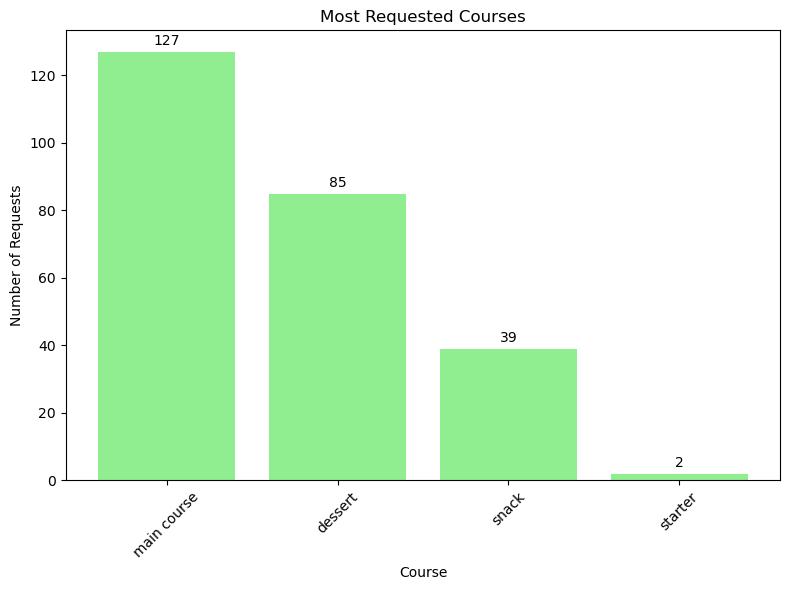

In [38]:
# Fetch Course category 
#course_categories = df['course'].unique()
#print(course_categories)
course_category_counts = df['course'].value_counts()
print(type(course_category_counts))
sorted_data = course_category_counts.sort_values(ascending=False)
print(sorted_data)
# Plotting as Bar chart 
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_data.index, sorted_data.values, color='lightgreen')
# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.xlabel('Course')
plt.ylabel('Number of Requests')
plt.title('Most Requested Courses')
plt.xticks(rotation=45)
plt.tight_layout()
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'BarChart_most_request_courses.png'))
plt.show()


### Question-1: f) Comparison between Vegetarians and Non-Veg orders in each region.

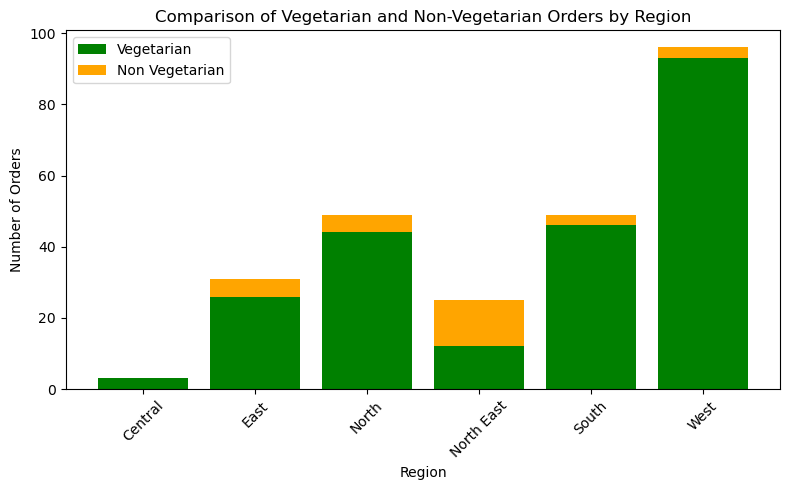

In [40]:
# Set mean value for Region 
mode_region = df['region'].mode()[0]
# Replace -1 with the mode value 
## with updated DataFrame
df['region'] = df['region'].replace('-1', mode_region)
 #Create a new column for count and group by 'region' and 'Diet'
df['Count'] = 1

# Reset index
agg_data = df.groupby(['region', 'Diet']).sum().reset_index()

# Pivot Data: index== 'region' , column 'Diet' , value counts 
pivot_data = agg_data.pivot(index='region', columns='Diet', values='Count').fillna(0)

# Set vegeterian values
vegetarian = pivot_data['vegetarian'] if 'vegetarian' in pivot_data.columns else 0

# Set non vegeterian values
non_vegetarian = pivot_data['non vegetarian'] if 'non vegetarian' in pivot_data.columns else 0

# Plotting - Stacked bar chart
plt.figure(figsize=(8, 5))
plt.bar(pivot_data.index, vegetarian, label='Vegetarian', color='green')
plt.bar(pivot_data.index, non_vegetarian, bottom=vegetarian, label='Non Vegetarian', color='orange')

# Adding labels, title, and legend
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Comparison of Vegetarian and Non-Vegetarian Orders by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'StackBarChart_veg_nonVeg.png'))
plt.show()

### Question-1: g) Create the box plot for Order cooking time to see the distribution. 
### Also check if there are any outliers in this column.

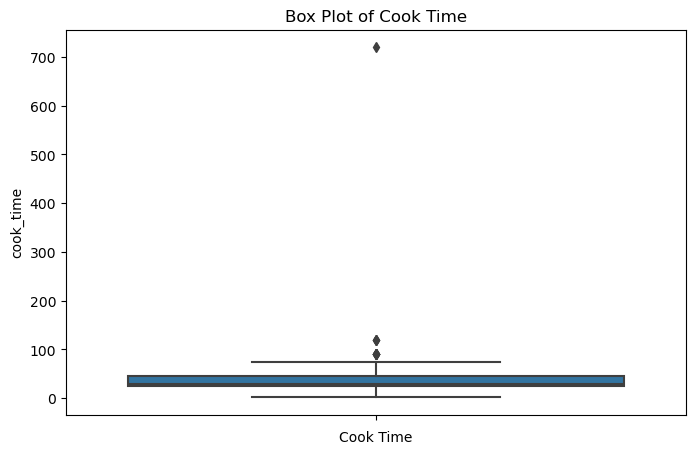

Outliers in 'cook_time':
27     120
34      90
62     720
75     120
83      90
114    120
115     90
128     90
130     90
142     90
144     90
Name: cook_time, dtype: int64


In [153]:
# Data values of  the 'cook_time' column
cook_time_data = df['cook_time']
# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=cook_time_data)
# Adding labels and title
plt.xlabel('Cook Time')
plt.title('Box Plot of Cook Time')
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'BoxChart_CookTime.png'))
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cook_time_data.quantile(0.25)
Q3 = cook_time_data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = cook_time_data[(cook_time_data < lower_bound) | (cook_time_data > upper_bound)]

# Display the outliers
print("Outliers in 'cook_time':")
print(outliers)

## Question-2 : Import the attached Billionaires_Stats.csv file in Jupyter notebook, and perform following operations using Pandas and Data visualization: 
### Data Sorce: Billionaires_Stats.csv

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("Billionaires_Stats.csv")
num_columns = df.shape[1]
num_columns

10

### Question-2 a)	Create a dataframe which will have the billionaires whose age is greater than or equal to 30. 
### Then create a scatter plot to show the relationship between age and net worth

#### Handle : age and net worth - missing values

In [44]:
missing_age = df['age'].isnull()
mode_age = df['age'].mode()[0]
print(f"Mode value of Age: {mode_age}")
# Replace age blank / empty with the mode value 
## with updated DataFrame
df['age'] = df['age'].replace("", mode_age)
df['age'].fillna(mode_age, inplace=True)
missing_age_values = df['age'].isnull()
print(f"Missing age values count: {missing_age.sum()}")
print(f"Missing age values count after replace: {missing_age_values.sum()}")
#Find missing net worth
missing_worth = df['finalWorth'].isnull()
print(f"Missing net Worth values count: {missing_worth.sum()}")

Mode value of Age: 60.0
Missing age values count: 0
Missing age values count after replace: 0
Missing net Worth values count: 0


#### Round age value : create scattered age vs net worth

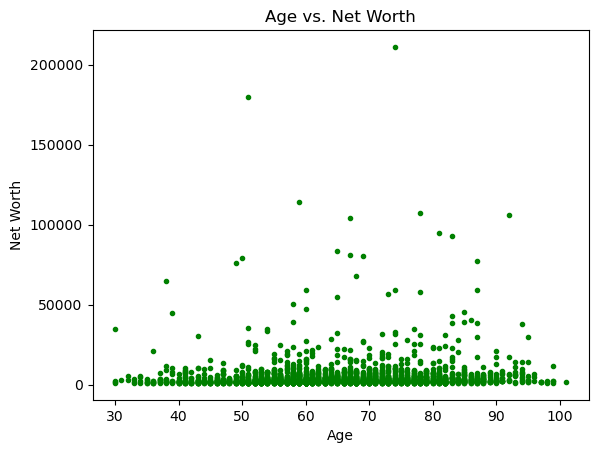

In [45]:
## round age value
df['age'] = df['age'].astype(int)
df['age'] = df['age'].round(0)
df_a = df[df['age'] >=30]
age_values = df_a['age']
worth_values = df_a['finalWorth']
plt.scatter(age_values, worth_values, color='green', marker='.')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Age vs. Net Worth')
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'ScatterdChart_AgeVsNtWorth.png'))
# Show the plot
plt.show()


### Question-2 b)Create a histogram to see the distribution of ages.

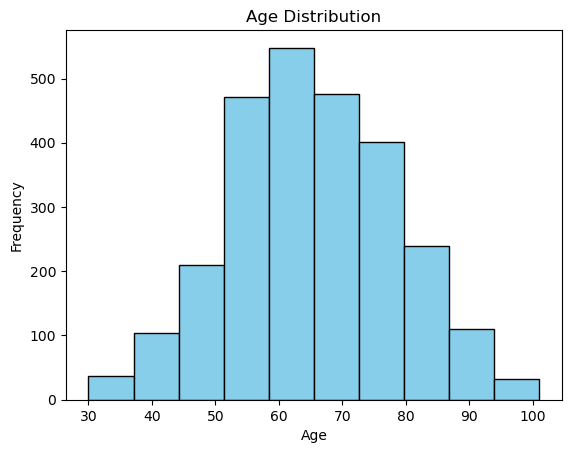

In [46]:
age_values = df_a['age']
# Create the histogram
plt.hist(age_values, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'HistogramChart_ages.png'))
plt.show()

#### Question-2 c)	Create a heatmap and see the correlation between all the numeric variables. 
#### Print the correlation value also in the heatmap

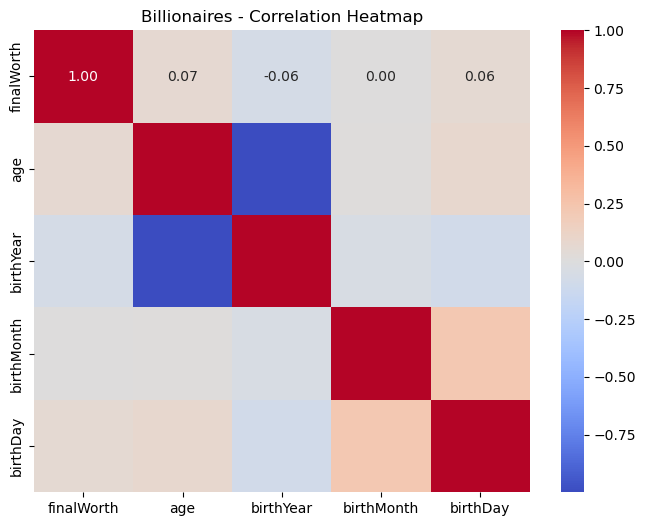

In [47]:
# consider number columns only
number_df = df_a.select_dtypes(include='number')
corr_matrix = number_df.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Billionaires - Correlation Heatmap')
pwd = os.getcwd()
# Save the plot to a file in the current working directory
plt.savefig(os.path.join(pwd, 'HeatMap_Billionaires_numericValues.png'))
plt.show()


In [ ]:
## file_path = os.path.join(pwd, 'correlation_matrix_heatmap.png')
## plt.savefig(file_path)


### Question-3 Name any 5 types of charts you are familiar with (using any of 3 libraries).
### Write the sample code also to create those charts using random data.

##### 1: Line Chart : matplotlib
##### Stock prices over a year with different company ? Year range : 2010 - 2020 , 
##### company name: Amazon, Google, Microsoft, Meta, Apple with random data

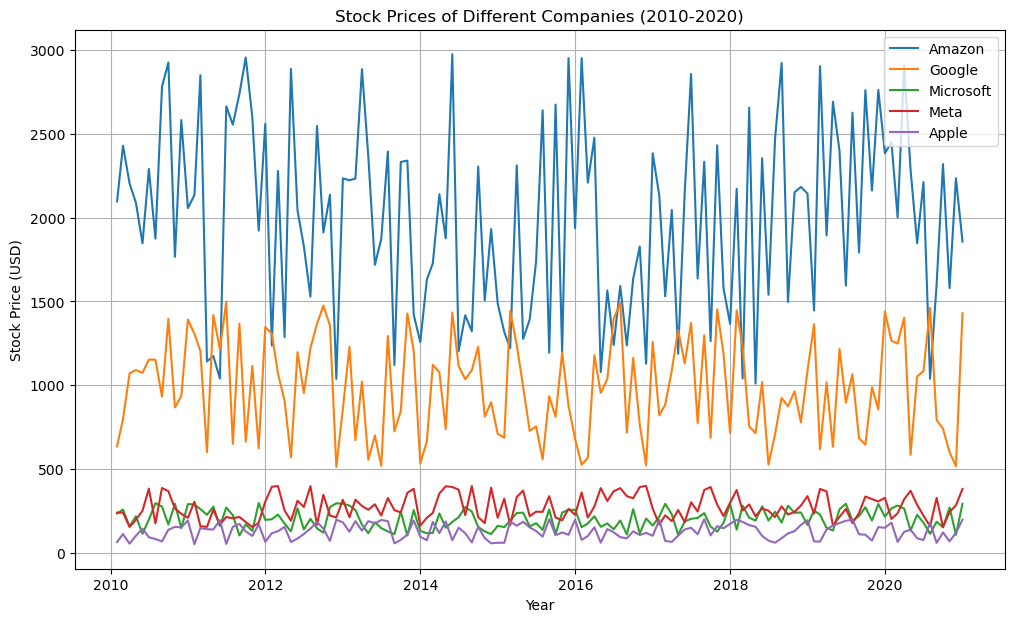

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dates
dates = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')

# Generate random stock prices, usind seed
np.random.seed(0)
# Set random prices for companies
amazon_prices = np.random.uniform(low=1000, high=3000, size=len(dates))
google_prices = np.random.uniform(low=500, high=1500, size=len(dates))
microsoft_prices = np.random.uniform(low=100, high=300, size=len(dates))
meta_prices = np.random.uniform(low=150, high=400, size=len(dates))
apple_prices = np.random.uniform(low=50, high=200, size=len(dates))

# Create a DataFrame
data = {
    'Date': dates,
    'Amazon': amazon_prices,
    'Google': google_prices,
    'Microsoft': microsoft_prices,
    'Meta': meta_prices,
    'Apple': apple_prices
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Amazon'], label='Amazon')
plt.plot(df.index, df['Google'], label='Google')
plt.plot(df.index, df['Microsoft'], label='Microsoft')
plt.plot(df.index, df['Meta'], label='Meta')
plt.plot(df.index, df['Apple'], label='Apple')

# Set title and labels
plt.title('Stock Prices of Different Companies (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#### 2: Pie chart : matplotlib, random market share values
#### Market share of different smartphone brands.
#### brand name: Iphone, Samsung, OnePlus, Vivo, XioMe

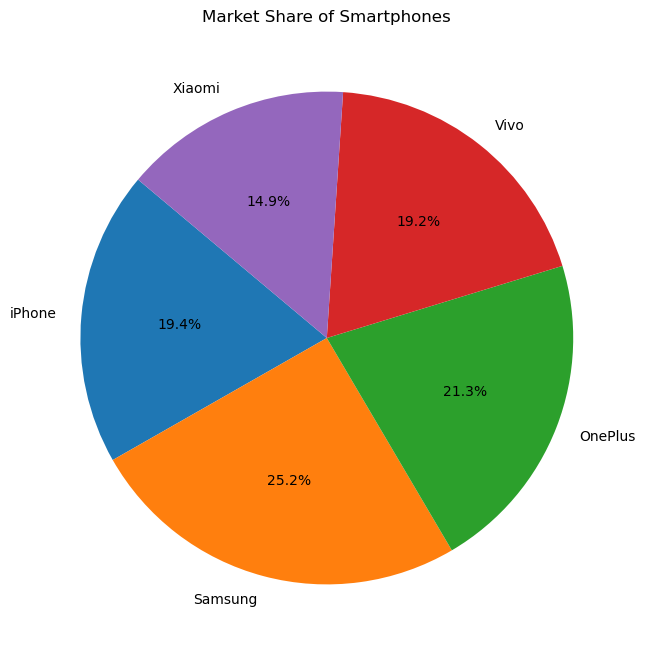

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Brand names
brands = ["iPhone", "Samsung", "OnePlus", "Vivo", "Xiaomi"]
np.random.seed(0)

# Generate random market share percentages
market_shares = np.random.rand(len(brands))
market_shares = (market_shares / market_shares.sum()) * 100 

#  pie chart - plotting
plt.figure(figsize=(8, 8))
plt.pie(market_shares, labels=brands, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Smartphones')
plt.show()


#### 3: Scattered : Plot (matplotlib) 
####  income vs health , with random data 

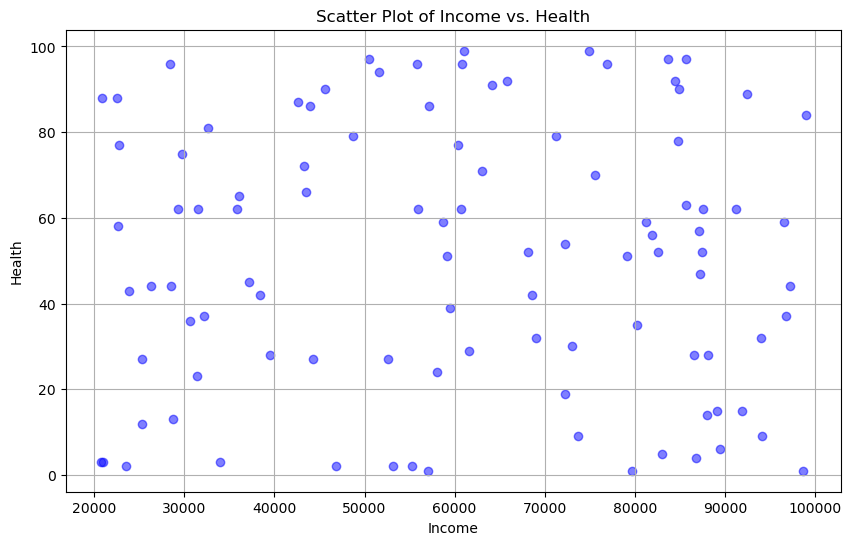

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for income and health
np.random.seed(42)  # For reproducibility
income = np.random.randint(20000, 100000, 100)
health = np.random.randint(1, 100, 100)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income, health, color='blue', alpha=0.5)
plt.title('Scatter Plot of Income vs. Health')
plt.xlabel('Income')
plt.ylabel('Health')
plt.grid(True)
plt.show()

#### 4: Heatmaps example : humidity over cloud density
#### matplotlib - random data

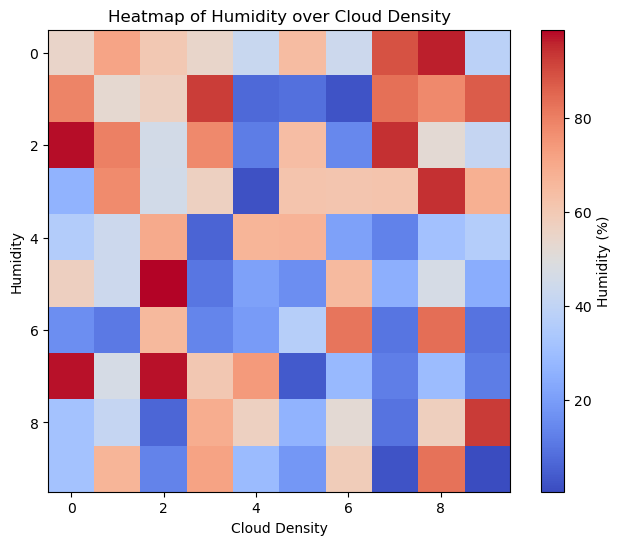

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for humidity and cloud density
np.random.seed(0)
humidity = np.random.rand(10, 10) * 100  # Random humidity values between 0 and 100
cloud_density = np.random.rand(10, 10) * 100  # Random cloud density values between 0 and 100

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(humidity, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Humidity (%)')
plt.title('Heatmap of Humidity over Cloud Density')
plt.xlabel('Cloud Density')
plt.ylabel('Humidity')
plt.show()

#### 5: Box Plots : matplotlib 
#### salaries of different department, IT, Finance, Production, HR, Admin, Support, Corporate 


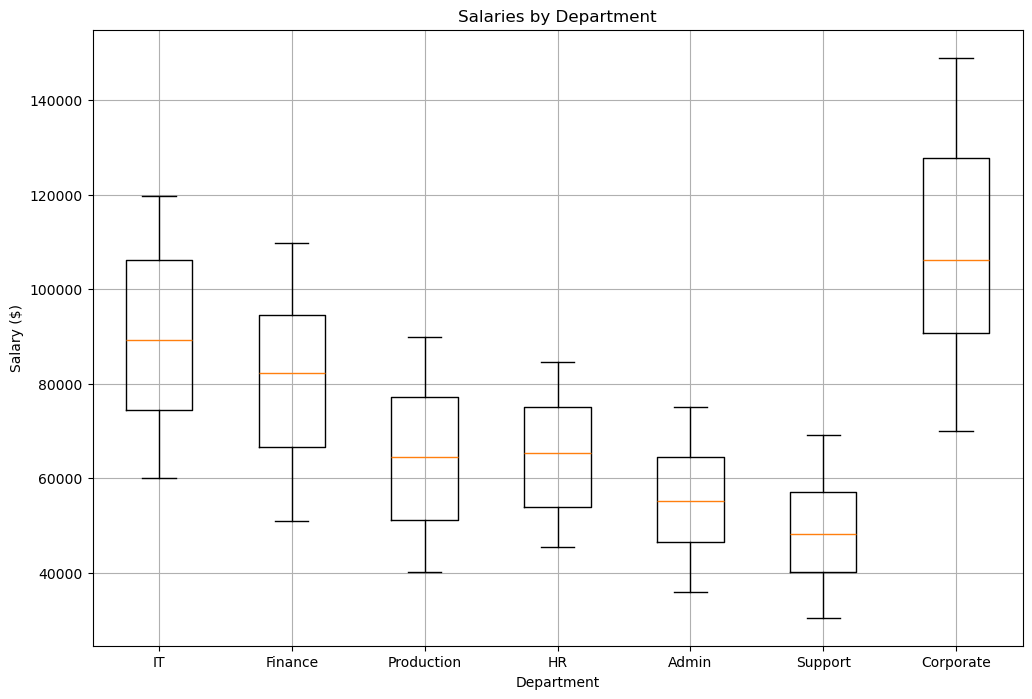

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Setting the seed for reproducibility
np.random.seed(20)

# Generating random salary data
departments = ['IT', 'Finance', 'Production', 'HR', 'Admin', 'Support', 'Corporate']
salary_ranges = {
    'IT': (60000, 120000),
    'Finance': (50000, 110000),
    'Production': (40000, 90000),
    'HR': (45000, 85000),
    'Admin': (35000, 75000),
    'Support': (30000, 70000),
    'Corporate': (70000, 150000)
}

salary_data = {dept: np.random.randint(low, high, 100) for dept, (low, high) in salary_ranges.items()}

# Creating the box plots
plt.figure(figsize=(12, 8))
plt.boxplot(salary_data.values(), labels=departments)
plt.title('Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.show()
